<a href="https://colab.research.google.com/github/gachet/ad-1-24/blob/main/pca/ejemplo_bueno_pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv("https://drive.google.com/uc?id=1wX7CmxGvEbenpSgNQ-Pt507jusYx2J8F")
data.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


In [ ]:
data.drop(columns = ["gender", "class"], inplace = True)
data.head()

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
0,27.0,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0
1,25.0,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0
2,31.0,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0
3,32.0,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0
4,28.0,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0


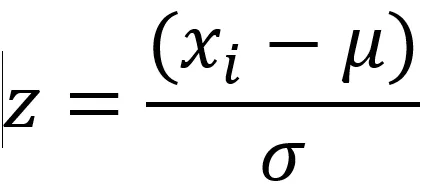

In [ ]:
def data_normalisation(scaled_data):
    for col in scaled_data.columns: #iterate over each column
        scaled_data[col] = (scaled_data[col]-scaled_data[col].mean())/scaled_data[col].std() #data normalisation

    return scaled_data

In [ ]:
scaled_data = data_normalisation(data)
print(scaled_data)

            age  height_cm  weight_kg  body fat_%  diastolic  systolic  \
0     -0.717405   0.443856   0.652126   -0.267357   0.112005 -0.015959   
1     -0.864187  -0.422450  -0.974698   -1.039042  -0.167272 -0.287810   
2     -0.423841   1.310163   0.883094   -0.432718   1.229112  1.479221   
3     -0.350450   0.704935   0.305672   -0.666979  -0.260364  1.139407   
4     -0.644014   0.621865   0.021146   -0.846121  -0.818918 -0.219847   
...         ...        ...        ...         ...        ...       ...   
13388 -0.864187   0.420122   0.364252   -0.970141  -0.446549  0.731631   
13389 -1.157752   1.322030  -0.296855   -1.535125  -0.446549 -0.151884   
13390  0.163287   1.025350   1.092305   -0.432718  -0.074180  0.119967   
13391  1.998064  -2.665352  -0.815698    2.364642  -1.005102 -0.627623   
13392 -0.203668  -0.541122  -0.112749   -0.515398   0.298189  1.343295   

       gripForce  sit and bend forward_cm  sit-ups counts  broad jump_cm  
0       1.688127                 0.3

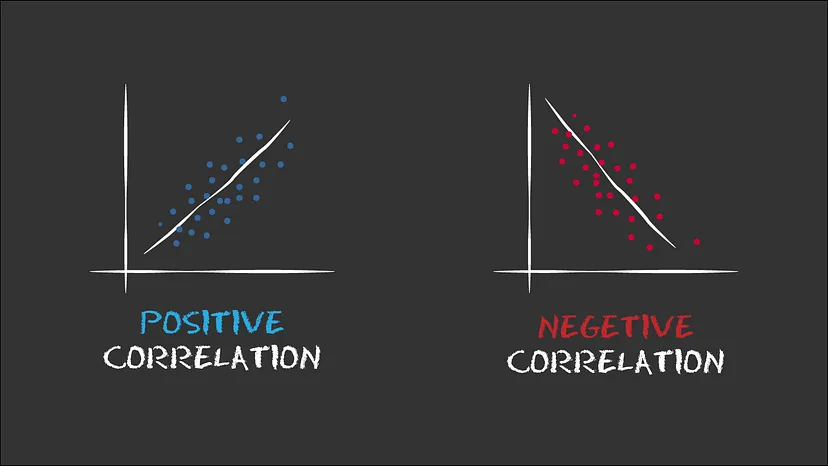

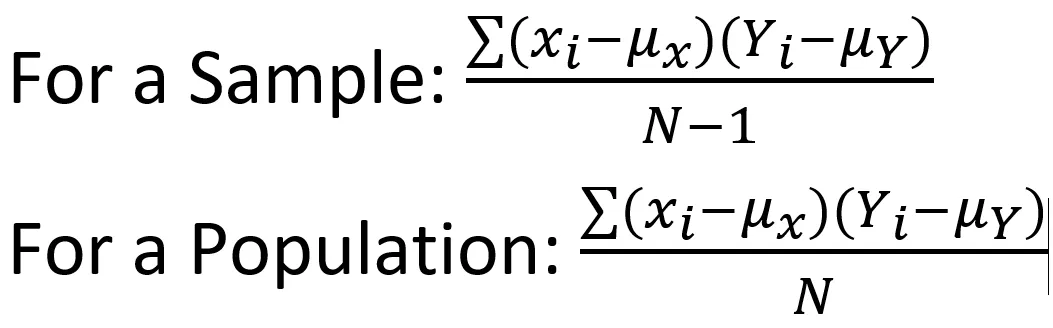

In [ ]:
def covariance_calculation(mean_subtracted):
    #calcualte covariance amongst scaled values
    for col in mean_subtracted.columns:
        mean_subtracted[col] = mean_subtracted[col]-mean_subtracted[col].mean()

    return np.dot(mean_subtracted.T,mean_subtracted)/(len(mean_subtracted) - 1)
cov_calc = covariance_calculation(scaled_data) #calling the above function

In [ ]:
from numpy.linalg import eig
w,v=eig(cov_calc)

Text(0.5, 0, 'Magnitude of the eigenvalue')

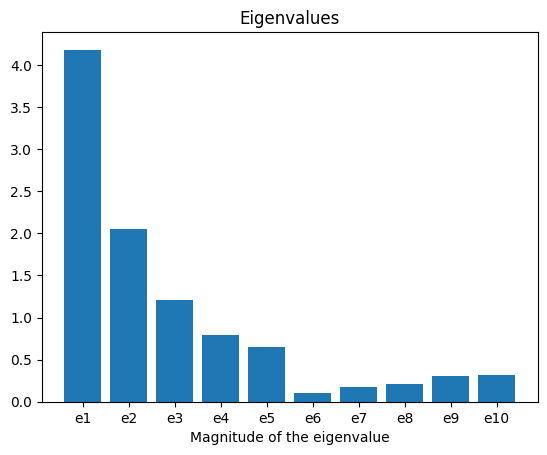

In [ ]:
import matplotlib.pyplot as plt
plt.bar(["e" + str(i+1) for i in range(len(w))], w)
plt.title("Eigenvalues")
plt.xlabel("Magnitude of the eigenvalue")

In [ ]:
useful_pc = v[:,:5] #keeping only the first 5 eigenvectors
principle_data = np.dot(data.values, useful_pc)#dot product of the two terms
print(principle_data)
print("Shape of the New data is:", principle_data.shape)


[[ 2.19871193 -0.46429554  0.2580907  -0.35626241 -0.52692618]
 [ 0.70774199 -1.54936635  0.74982721  0.01797706  1.08945482]
 [ 1.90322116  1.52966508  0.32908872 -0.53236847  0.342167  ]
 ...
 [ 2.55803425  0.36410313 -0.37991379  0.70247115 -1.0660461 ]
 [-5.79889837  1.1901717  -1.29366639  0.47923032 -0.56205882]
 [ 0.35800167  0.65545075  0.37116611 -0.17538657  1.33809726]]
Shape of the New data is: (13393, 5)
